## 一、数据加工

In [414]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

scrape=pd.read_csv(r'result_new.csv',encoding='gbk')
industry=pd.read_csv(r'鲜花礼品.csv',encoding='gbk')

# scrape.shape #10034
# scrape.搜索词.unique().shape #501
scrape.head()

,抓取时间,搜索词,创意标题,标题飘红,创意描述,描述飘红,广告主,排名
0,2019/11/17 11:02,江苏鲜花全国速递,NaN,NaN,NaN,NaN,NaN,1
1,2019/11/17 11:02,江苏鲜花全国速递,江苏\n鲜花速递\n鲜花 实体花店 爱上\n鲜花\n送花上门 江苏\n鲜花速递\n鲜花本地...,NaN,"鲜花速递\n鲜花 , 鲜花速递鲜花 , 精选A级花材 , 2小时送达 , 专车配送 , 12...",NaN,www.ismei.net,2
2,2019/11/17 11:02,江苏鲜花全国速递,江苏鲜花快递服务_江苏鲜花快递服务电话,江苏鲜花快递 江苏鲜花快递,"江苏鲜花快递服务公司, 江苏同城鲜花快递公司,江苏专注鲜花速递服务10年,提供24小时网上订...",江苏鲜花快递 鲜花快递 鲜花速递 鲜花速递,买花网,3
3,2019/11/17 11:02,江苏鲜花全国速递,江苏鲜花快递_{鲜花快递 送花只需1~2H}_江苏有同城快递送花吗,江苏鲜花快递 鲜花快递 快递,"4天前-江苏鲜花快递网,国内领先的鲜花快递服务网站全国连锁鲜花快递3小时送达全国保证了鲜花的...",江苏鲜花快递 鲜花快递 全国 鲜花快递 全国,蛋糕速递网,4
4,2019/11/17 11:02,江苏鲜花全国速递,江苏同城鲜花快递_江苏同城鲜花速递手机版,江苏 鲜花快递 江苏 鲜花速递,"江苏鲜花快递服务公司, 江苏同城鲜花快递公司,江苏最实惠的网上订花平台,专为异地恋、同城配送...",江苏鲜花快递 鲜花快递 鲜花速递,蛋糕速递网,5


In [2]:
industry.head()

,关键词,日均搜索量,分类
0,鲜花全国速递,763,鲜花词
1,鲜花速递,64855,鲜花词
2,鲜花蛋糕礼品,7,鲜花词
3,鲜花礼品蛋糕,14,鲜花词
4,送给情人的鲜花,14,鲜花词


In [3]:
industry.分类.unique()

array(['鲜花词', '服务词', '网站词', '礼品词', '加盟词', '疑问词', '地域词', '价格词', '公司词'],
      dtype=object)

In [4]:
type=['鲜花词', '服务词', '网站词', '礼品词', '加盟词', '疑问词', '地域词', '价格词', '公司词']

number=[]
for word in type:
    number.append(len(industry[industry.分类==word]))
number    

[158, 5, 10, 120, 5, 148, 77, 42, 8]

In [5]:
scrape.搜索词.unique().shape #501个关键词

(501,)

In [6]:
industry.关键词.unique().shape #501个关键词

(501,)

In [7]:
#缺失值
scrape.isnull().sum()


抓取时间       0
搜索词        0
创意标题    2332
标题飘红    4339
创意描述    2663
描述飘红    3698
广告主     5818
排名         0
dtype: int64

In [12]:
##删除存在缺失值的广告主
df1=scrape.dropna(subset=['广告主'])

In [13]:
df1.isnull().sum()
df1.shape 

(4216, 8)

In [14]:
# 将URL转换为广告主名称：删除www.,.net,.com

#清洗函数
web=['www.','.net','.com','hs.','.cn']
def clean(x):
    for line in x:
        for word in web:
            if word in x:
                x=x.replace(word,'')
    return x

#清洗
df1.广告主=df1.广告主.apply(clean)

In [15]:
#异常值
#无效值

In [16]:
#重复值不存在
df1.duplicated==True

False

In [17]:
#其他数据加工工作？？？？？？？

In [18]:
df1.to_csv(r'clean.csv',encoding="gbk")

In [19]:
clean=pd.read_csv('clean.csv',encoding="gbk")
clean.head()

,Unnamed: 0,抓取时间,搜索词,创意标题,标题飘红,创意描述,描述飘红,广告主,排名
0,1,2019/11/17 11:02,江苏鲜花全国速递,江苏\n鲜花速递\n鲜花 实体花店 爱上\n鲜花\n送花上门 江苏\n鲜花速递\n鲜花本地...,NaN,"鲜花速递\n鲜花 , 鲜花速递鲜花 , 精选A级花材 , 2小时送达 , 专车配送 , 12...",NaN,ismei,2
1,2,2019/11/17 11:02,江苏鲜花全国速递,江苏鲜花快递服务_江苏鲜花快递服务电话,江苏鲜花快递 江苏鲜花快递,"江苏鲜花快递服务公司, 江苏同城鲜花快递公司,江苏专注鲜花速递服务10年,提供24小时网上订...",江苏鲜花快递 鲜花快递 鲜花速递 鲜花速递,买花网,3
2,3,2019/11/17 11:02,江苏鲜花全国速递,江苏鲜花快递_{鲜花快递 送花只需1~2H}_江苏有同城快递送花吗,江苏鲜花快递 鲜花快递 快递,"4天前-江苏鲜花快递网,国内领先的鲜花快递服务网站全国连锁鲜花快递3小时送达全国保证了鲜花的...",江苏鲜花快递 鲜花快递 全国 鲜花快递 全国,蛋糕速递网,4
3,4,2019/11/17 11:02,江苏鲜花全国速递,江苏同城鲜花快递_江苏同城鲜花速递手机版,江苏 鲜花快递 江苏 鲜花速递,"江苏鲜花快递服务公司, 江苏同城鲜花快递公司,江苏最实惠的网上订花平台,专为异地恋、同城配送...",江苏鲜花快递 鲜花快递 鲜花速递,蛋糕速递网,5
4,6,2019/11/17 11:02,江苏鲜花全国速递,江苏花店_江苏鲜花店订花/江苏网上花店送花_江苏鲜花速递 - 玖号...,江苏 江苏鲜花 江苏鲜花速递,2019年10月24日-玖号花店(微信wdp3401)隶属玖号鲜花网旗下。为你提供:江苏鲜花...,江苏鲜花 江苏鲜花速递 江苏鲜花,玖号花店,7


## 二、画图

### 1.投放概况：广告主投放量柱状图、投放排名折线图

### 2.词云图

In [72]:
# 抽取前十个
# df1_sample=df1[:10]
information=[str(a) for a in df1.创意描述.values.tolist()]

In [73]:
#对创意描述进行分词
import jieba 
    #循环
contents=[]
for line in information:
    current_segment=jieba.lcut(line) #lcut对当前这句话进行切割
    if len(current_segment)>1 and current_segment !='/r/n': #不等于换行符
        contents.append(current_segment) #拼接

In [74]:
df1_split=pd.DataFrame({'contents':contents})
df1_split.head()

,contents
0,"[鲜花, 速递, \n, 鲜花, , ,, , 鲜花, 速递, 鲜花, , ,, ,..."
1,"[江苏, 鲜花, 快递, 服务公司, ,, , 江苏, 同, 城, 鲜花, 快递, 公司,..."
2,"[4, 天前, -, 江苏, 鲜花, 快递, 网, ,, 国内, 领先, 的, 鲜花, 快递..."
3,"[江苏, 鲜花, 快递, 服务公司, ,, , 江苏, 同, 城, 鲜花, 快递, 公司,..."
4,"[2019, 年, 10, 月, 24, 日, -, 玖, 号, 花店, (, 微信, wd..."


In [75]:
#去停用词

#导入停用词
df_stopwords=pd.read_excel('stopwords.xlsx')
df_stopwords.head()

#去停用词函数
def drop_stopwords(contents,stopwords):
    contents_clean=[]  #
    for line in contents:
#         line_clean=[]   
        for word in line:
            if word in stopwords:
                continue
#             line_clean.append(word)
            contents_clean.append(str(word))
    return contents_clean   
#赋值
contents=df1_split.contents.values.tolist()
stopwords=df_stopwords.stopword.values.tolist()
#运用函数
contents_clean=drop_stopwords(contents,stopwords) 

In [76]:
#把contents_clean[index_num]从list转化为str
contents_clean_str=[]
for line_index in range(len(contents_clean)):
    contents_clean_str.append(''.join(contents_clean[line_index]))

#把contents_clean从list转化为str
contents_clean_str=''.join(contents_clean_str)

In [77]:
displace=['\n','200250','wdp3401']
for word in displace:
    contents_clean_str=contents_clean_str.replace(word,'')

In [78]:
#用TF-IDF做词频统计
import jieba.analyse
print(' '.join(jieba.analyse.extract_tags(contents_clean_str,topK=30,withWeight=False))) #提取五个关键词，并空格来分隔

鲜花 速递 花店 送花 订花 鲜花礼品 配送 情人节 小时 鲜花店 礼盒 鲜花网 送达 上门 礼品 花材 免费 服务 预定 浪漫 免费送 12 分类 24 情有独钟 绿植 牵手 信息 花儿 直营


In [79]:
contents_clean_str

'鲜花速递鲜花  鲜花速递鲜花  精选级花材  2小时送达  专车配送  年品牌老店  2h闪电送达  认准品牌店  实体花店  爱上鲜花 鲜花配送  送花上门  网浪漫礼盒浪漫礼盒幸福花儿幸福花儿情有独钟情有独钟牵手一辈子牵手一辈子查看信息 价格599花材99枝戴安娜粉玫瑰相思梅围圈表白求婚纪念日服务城速递 准时送达鲜花速递鲜花速递 鲜花提前预定  爱上鲜花网  专人免费送花上门  当天制作 鲜花花篮订制  鲜花热门分类送恋人送朋友送长辈价格区间100200200300300500 鲜花网速递花礼网24小时在线订单13小时送达全国2000城市 鲜花速递 鲜花速递  花材新鲜  花多彩24小时订花服务  2小时送达  花多彩百款精美花束热销  送花实体线  送花认准花多彩  网上订花  品类齐全  质量保钟情钟情爱呼唤爱呼唤甜美公主甜美公主执子之手执子之手300600查看信息鲜花快递服务公司 城鲜花快递专注鲜花速递服务10年24小时网上订花送花城鲜花预定城鲜花异地鲜花速递送花上门足不出户4鲜花快递网国内领先鲜花快递服务网站全国连锁鲜花快递3小时送达全国保证鲜花新鲜程度3小时送达速度诚信快捷服务发展壮大真诚恭候鲜花快递服务公司 城鲜花快递实惠网上订花专异地恋城配送送想惊喜用户服务城鲜花异地鲜花速递送花2019年10月24日玖号花店隶属玖号鲜花网旗下鲜花送花订花鲜花速递鲜花预定网上订花网上送花服务7回头率 8.2%  太仓市 75.93 鲜花速递全国顺丰包邮礼盒花玫瑰礼盒快递鲜花礼品花订花上海送花 昆山市城镇真到实服饰商行 1年 回头率 0% 鲜花速递 鲜花速递  当天制作  12小时送到 鲜花配送  花艺师制作  2h闪电送达  全国连锁花店  在线鲜花购买  2小时免费送花上门 鲜花提前浪漫礼盒浪漫礼盒幸福花儿幸福花儿情有独钟情有独钟牵手一辈子牵手一辈子查看信息 网上订花花礼网鲜花礼品行业精耕13栽13小时送达全国1000城市网上订花 认证行业龙头企业诚信经营用心服务打造品牌百年老店热门分类爱情鲜花生日鲜花友谊鲜花价格区间150150250250350 鲜花速递 鲜花速递  花材新鲜  花店  网上订花  质量保证  贴心服务  花多彩送花上门服务  实体热门分类爱情鲜花生日鲜花鲜花礼盒热门风格实体花店市区免费配送2h闪电送达 花送鲜花鲜花速递知名品牌鲜花速递 24

In [80]:
keywords=jieba.analyse.extract_tags(contents_clean_str,topK=100,withWeight=True)
 #输出一张关键词重要性排名的表
keywords=pd.DataFrame(keywords) 
keywords.head()

,0,1
0,鲜花,0.867305
1,速递,0.223216
2,花店,0.180429
3,送花,0.166802
4,订花,0.129768


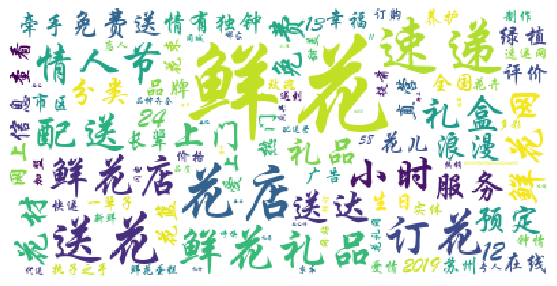

In [81]:

#词云

#！pip install WordCloud
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams['figure.figsize']=(10,5) #设置画布大小
from PIL import Image

#设置基本参数
mask = np.array(Image.open('model2.jpg'))
wordcloud=WordCloud( font_path = r'‪C:\Windows\Fonts\STXINGKA.TTF',background_color="white",max_font_size=80)

#导入词频
word_frequency={x[0]:x[1] for x in keywords.values}

#画出词云图
wordcloud=wordcloud.fit_words(word_frequency)
plt.axis("off")
plt.imshow(wordcloud)

wordcloud.to_file('flower.png')

In [381]:
#画头部广告主的词云图
top5=df_promote.sort_values(['品牌推广度指数'])[:5]['广告主'].values
top5

array(['suning', '爱花365', '黔东南信息港', '互站网', '企业梦工厂'], dtype=object)

In [397]:
df1_top5=df1[(df1.广告主=='suning') | (df1.广告主=='爱花365') |(df1.广告主=='黔东南信息港') |(df1.广告主=='互站网') |(df1.广告主=='企业梦工厂')]
df1_top5.head()

,抓取时间,搜索词,创意标题,标题飘红,创意描述,描述飘红,广告主,排名
2837,2019/11/17 11:05,江苏四季鲜花礼品网鲜花速递服务,"鲜花网|全球鲜花礼品网-送鲜花网,送鲜花速递网,网上订花送花上门,...",鲜花 鲜花礼品网 鲜花 鲜花速递,"鲜花网,送鲜花,选鲜花蛋糕礼品网(爱花365网)-鲜花网领先品牌,ihua365.com专注...",鲜花速递服务 鲜花 礼品网站,爱花365,12
2921,2019/11/17 11:05,江苏礼品鲜花购物网站,【商城网站+手机端】织梦鲜花礼品购物商城系统网站源码带购物车,网站 鲜花礼品购物 网站 购物,"2019年5月30日-换成你的,颜色都可以修改,改完让你耳目一新的感觉,自带手机移动端,同一...",购物 鲜花,互站网,21
4448,2019/11/17 11:07,江苏鲜花礼品零售,江苏红掌批发 欢迎来电「山货街供应」 - 企业商情,江苏,"2019年10月28日-江苏红掌批发, 红掌山货街-中国(云南)鲜花交易...7、 对于小的...",江苏 鲜花 零售 礼品,黔东南信息港,21
7479,2019/11/17 11:10,江苏教师节鲜花算礼品吗,【苏宁企业购】\n教师节\n送什么\n礼物\n好_企业采购_企业办公之选,NaN,苏宁企业购，\n教师节\n送什么\n礼物\n好，超值低价享不停，企业专享特权，为企业提供多样...,NaN,suning,14
8262,2019/11/17 11:11,江苏泊里镇鲜花礼品,黄岛区泊里花季花店_简介_地址_电话-企业梦工厂,泊里,2016年1月1日-黄岛区泊里花季花店的简介、地址、电话、联系人、经营范围等信息!... 黄...,鲜花 泊里镇,企业梦工厂,11


In [398]:
information=[str(a) for a in df1_top5.创意描述.values.tolist()]

#对创意描述进行分词
import jieba 
    #循环
contents=[]
for line in information:
    current_segment=jieba.lcut(line) #lcut对当前这句话进行切割
    if len(current_segment)>1 and current_segment !='/r/n': #不等于换行符
        contents.append(current_segment) #拼接

df1_split=pd.DataFrame({'contents':contents})
df1_split.head()

,contents
0,"[鲜花网, ,, 送, 鲜花, ,, 选, 鲜花蛋糕, 礼品网, (, 爱花, 365, 网..."
1,"[2019, 年, 5, 月, 30, 日, -, 换成, 你, 的, ,, 颜色, 都, ..."
2,"[2019, 年, 10, 月, 28, 日, -, 江苏, 红掌, 批发, ,, , 红..."
3,"[苏宁, 企业, 购, ，, \n, 教师节, \n, 送, 什么, \n, 礼物, \n,..."
4,"[2016, 年, 1, 月, 1, 日, -, 黄岛区, 泊里, 花季, 花店, 的, 简..."


In [399]:
#去停用词

#导入停用词
df_stopwords=pd.read_excel('stopwords.xlsx')
df_stopwords.head()

#去停用词函数
def drop_stopwords(contents,stopwords):
    contents_clean=[]  #
    for line in contents:
#         line_clean=[]   
        for word in line:
            if word in stopwords:
                continue
#             line_clean.append(word)
            contents_clean.append(str(word))
    return contents_clean   
#赋值
contents=df1_split.contents.values.tolist()
stopwords=df_stopwords.stopword.values.tolist()
#运用函数
contents_clean=drop_stopwords(contents,stopwords) 

In [400]:
#把contents_clean[index_num]从list转化为str
contents_clean_str=[]
for line_index in range(len(contents_clean)):
    contents_clean_str.append(''.join(contents_clean[line_index]))

#把contents_clean从list转化为str
contents_clean_str=''.join(contents_clean_str)

In [401]:
displace=['\n','200250','wdp3401']
for word in displace:
    contents_clean_str=contents_clean_str.replace(word,'')

In [405]:
contents_clean_str

'鲜花网送鲜花选鲜花蛋糕礼品网爱花365网鲜花网领先品牌ihua365com专注鲜花速递服务10年销量居鲜花 礼品网站首位鲜花网24小时预订鲜花城送花异地2019年5月日换成颜色修改改完耳目一新感觉自带手机端同一个后台即时同步简单购物功能在线下单买鲜花企业在线购买需求2019年10月28日红掌批发 红掌山货街中国云南鲜花交易7 零售花店私人家庭用花机械行业设备 礼品工艺品饰品 汽摩配件 昆苏宁企业购教师节送礼物超值低价享不停企业专享特权企业多样化采购方案「苏宁企业购教师节送礼物一站式采购员工福利办公2016年1月1日黄岛区泊里花季花店简介地址电话联系人经营范围信息 黄岛区泊里花季花店 简介经营零售鲜花经营山东省青岛市黄岛区泊里镇河'

In [402]:
#用TF-IDF做词频统计
import jieba.analyse
print(' '.join(jieba.analyse.extract_tags(contents_clean_str,topK=30,withWeight=False))) #提取五个关键词，并空格来分隔

鲜花 黄岛区 花店 鲜花网 泊里 红掌 10 2019 花季 教师节 送礼物 企业 简介 礼品 苏宁 在线 汽摩配 零售 采购 员工福利 鲜花蛋糕 礼品网 爱花 365 ihua365com 24 改完 28 用花 专享


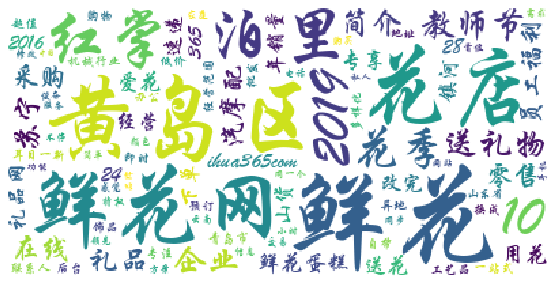

In [404]:
keywords=jieba.analyse.extract_tags(contents_clean_str,topK=150,withWeight=True)
 #输出一张关键词重要性排名的表
keywords=pd.DataFrame(keywords) 
keywords.head()
#词云

#！pip install WordCloud
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams['figure.figsize']=(10,5) #设置画布大小
from PIL import Image

#设置基本参数
mask = np.array(Image.open('model2.jpg'))
wordcloud=WordCloud( font_path = r'‪C:\Windows\Fonts\STXINGKA.TTF',background_color="white",max_font_size=80)

#导入词频
word_frequency={x[0]:x[1] for x in keywords.values}

#画出词云图
wordcloud=wordcloud.fit_words(word_frequency)
plt.axis("off")
plt.imshow(wordcloud)

wordcloud.to_file('flower_top5.png')

### 四象限图

### （一）计算品牌推广指数

In [87]:
df1.搜索词.unique().shape #501
df1.广告主.unique().shape #228

(501,)

In [239]:
#1.qi每个关键词的搜索量，用于衡量每个关键词的价值，作为品牌推广指数的权重

df_qi=df1.groupby('搜索词').agg({'创意标题':'count'}) 
df_qi.columns=['qi']
df_qi=df_qi.reset_index()
df_qi.head()
# df_qi.shape 501


,搜索词,qi
0,江苏七夕情人节订什么鲜花,10
1,江苏七夕情人节送女朋友什么礼品,10
2,江苏七夕情人节鲜花,10
3,江苏七夕情人节鲜花价格,5
4,江苏七夕情人节鲜花预定,6


In [298]:
# 2.Cij,Rij:

df_cr=df1.groupby(['广告主','搜索词']).agg({'创意标题':'count','排名':'mean'}) 
df_cr.columns=['cij','rij']
df_cr=df_cij.reset_index()

# Cij/Rij:
df_cr['cij/rij']=df_cr.cij/df_cr.rij

df_cr.head()
# df_cr.shape #3263

,index,广告主,搜索词,cij,rij,cij/rij
0,0,100招商网,江苏石龙镇鲜花礼品网,1,7.0,0.142857
1,1,1688,江苏情人节礼品,1,7.0,0.142857
2,2,1688,江苏情人节鲜花包法,1,14.0,0.071429
3,3,1688,江苏情人节鲜花图片,1,14.0,0.071429
4,4,1688,江苏情人节鲜花花语,1,14.0,0.071429


In [339]:
#用循环生成新的变量

for line in range(len(df_cr)): #line是0-3263
    df_cr.loc[line,'qi']=df_qi['qi'][df_qi.搜索词==df_cr.loc[line,'搜索词']].values  #提取出了series的值


In [340]:
df_cr.head()

,index,广告主,搜索词,cij,rij,cij/rij,pi,cij/rij*pi,qi
0,0,100招商网,江苏石龙镇鲜花礼品网,1,7.0,0.142857,4.0,0.571429,4.0
1,1,1688,江苏情人节礼品,1,7.0,0.142857,9.0,1.285714,9.0
2,2,1688,江苏情人节鲜花包法,1,14.0,0.071429,7.0,0.500000,7.0
3,3,1688,江苏情人节鲜花图片,1,14.0,0.071429,7.0,0.500000,7.0
4,4,1688,江苏情人节鲜花花语,1,14.0,0.071429,10.0,0.714286,10.0


In [341]:
#计算crp
df_cr['cij/rij*qi']=(df_cr.cij/df_cr.rij)*df_cr['qi']
df_cr.head()

,index,广告主,搜索词,cij,rij,cij/rij,pi,cij/rij*pi,qi,cij/rij*qi
0,0,100招商网,江苏石龙镇鲜花礼品网,1,7.0,0.142857,4.0,0.571429,4.0,0.571429
1,1,1688,江苏情人节礼品,1,7.0,0.142857,9.0,1.285714,9.0,1.285714
2,2,1688,江苏情人节鲜花包法,1,14.0,0.071429,7.0,0.500000,7.0,0.500000
3,3,1688,江苏情人节鲜花图片,1,14.0,0.071429,7.0,0.500000,7.0,0.500000
4,4,1688,江苏情人节鲜花花语,1,14.0,0.071429,10.0,0.714286,10.0,0.714286


In [347]:
#根据广告主分组加总他的品牌推广指数
df_promote=df_cr.groupby('广告主').agg({'cij/rij*qi':sum})  #是否可以直接在原表的基础上进行分组聚合????？？？？？
df_promote.columns=['品牌推广度指数']
df_promote=df_promote.reset_index()
df_promote.head()

#228行

,广告主,品牌推广度指数
0,100招商网,0.571429
1,1688,3.500000
2,1688加盟网,8.419841
3,1号店,0.421053
4,23加盟网,1.441558


### （二）计算品牌知名度指数

In [368]:
df_know=df1.groupby(['广告主','搜索词']).agg({'创意标题':'count'}) 
df_know.columns=['检索量']
df_know=df_know.reset_index()
df_know.head()

,广告主,搜索词,检索量
0,100招商网,江苏石龙镇鲜花礼品网,1
1,1688,江苏情人节礼品,1
2,1688,江苏情人节鲜花包法,1
3,1688,江苏情人节鲜花图片,1
4,1688,江苏情人节鲜花花语,1


In [369]:
df_know=df_know.groupby(['广告主']).agg({'检索量':'mean'}) 
df_know.columns=['品牌知名度指数']
df_know=df_know.reset_index()
df_know.head()

#228行

,广告主,品牌知名度指数
0,100招商网,1.0
1,1688,1.0
2,1688加盟网,1.5
3,1号店,1.0
4,23加盟网,1.0


In [372]:
#拼接
merge=pd.merge(df_promote,df_know)
merge.head()

,广告主,品牌推广度指数,品牌知名度指数
0,100招商网,0.571429,1.0
1,1688,3.500000,1.0
2,1688加盟网,8.419841,1.5
3,1号店,0.421053,1.0
4,23加盟网,1.441558,1.0


In [373]:
merge.to_csv(r'推广与知名度情况.csv',encoding='gbk')